> # IMPORTING LIBS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> # Importing Data

In [2]:
startups = pd.read_excel('startup-expansion.xlsx')
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
startups.describe().round(2)

,Store ID,Marketing Spend,Revenue
count,150.00,150.00,150.00
mean,75.50,2893.15,39301.43
std,43.45,367.86,15465.75
min,1.00,1811.00,15562.00
25%,38.25,2662.25,21113.50
50%,75.50,2898.00,42993.00
75%,112.75,3111.50,51145.50
max,150.00,3984.00,68828.00


In [5]:
startups[['Marketing Spend', 'Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


> # **Preprocessing Data**

In [6]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [7]:
startups['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [8]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [9]:
startups['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [10]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [11]:
startups['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

**Check The missing Values**

In [12]:
startups.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

*Check The Duplicated*

In [13]:
startups.duplicated().sum()

0

In [14]:
startups['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

> # ANALYSING STEP

****Get 10 as sample****

In [15]:
startup_sample = startups.sample(10)

In [16]:
startup_sample

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
81,82,Fort Lauderdale,Florida,Region 1,Old,3217,54768
89,90,Tacoma,Washington,Region 2,Old,2552,45666
119,120,Santa Clarita,California,Region 2,Old,2967,51882
69,70,Centennial,Colorado,Region 2,Old,3697,18966
139,140,Providence,Rhode Island,Region 1,Old,3191,62337
9,10,Rochester,New York,Region 1,Old,2984,64906
20,21,Concord,California,Region 2,Old,2521,38178
140,141,Chattanooga,Tennessee,Region 2,New,3587,55357
16,17,Tallahassee,Florida,Region 1,Old,2737,47729
86,87,Amarillo,Texas,Region 2,Old,3984,56089


<AxesSubplot:>

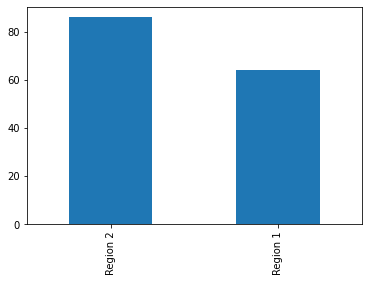

In [17]:
startups['Sales Region'].value_counts().plot.bar()

In [18]:
startups[startups['New Expansion'] == 'Old']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
135,136,San Mateo,California,Region 2,Old,1811,19426
136,137,Warren,Michigan,Region 1,Old,2736,47262
137,138,Norwalk,California,Region 2,Old,3112,19703
138,139,Lafayette,Louisiana,Region 1,Old,2603,40255


In [19]:
startups[startups['New Expansion'] == 'Old'].groupby('City').max()['Revenue'].nlargest(10)

City
Little Rock       68828
Grand Rapids      65475
Rochester         64906
Oxnard            64302
Fontana           63027
Providence        62337
Birmingham        60338
Overland Park     59887
San Bernardino    59870
Worcester         59840
Name: Revenue, dtype: int64

In [20]:
startups[startups['New Expansion'] == 'New']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
140,141,Chattanooga,Tennessee,Region 2,New,3587,55357
141,142,Tempe,Arizona,Region 2,New,2911,48954
142,143,Joliet,Illinois,Region 1,New,3279,48315
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366
144,145,Glendale,California,Region 2,New,2363,49376
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457
149,150,Thousand Oaks,California,Region 2,New,2431,40141


In [21]:
startups[startups['New Expansion'] == 'New'].groupby('City').max()['Revenue'].nlargest(10)

City
Brownsville         63148
Chattanooga         55357
Rancho Cucamonga    52366
Glendale            49376
Tempe               48954
Joliet              48315
Rockford            43377
Thousand Oaks       40141
Paterson            34603
College Station     22457
Name: Revenue, dtype: int64

In [22]:
startups[startups['New Expansion'] == 'Old'].groupby('State').sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [23]:
startups[startups['New Expansion'] == 'New'].groupby('State').sum()['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [24]:
startups['ROI'] = round((startups['Revenue'] / startups['Marketing Spend']) * 100, 2)

In [25]:
startups['ROI']

0      1868.90
1      1675.43
2      1790.25
3      1387.60
4      2087.38
        ...   
145    1537.23
146    1718.31
147    1638.10
148     750.07
149    1651.21
Name: ROI, Length: 150, dtype: float64

In [26]:
startups['Profits'] = startups['Revenue'] - startups['Marketing Spend']

In [27]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,ROI,Profits
0,1,Peoria,Arizona,Region 2,Old,2601,48610,1868.90,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,1675.43,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,1790.25,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,1387.60,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,2087.38,57018
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,1537.23,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,1718.31,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,1638.10,40729
148,149,College Station,Texas,Region 2,New,2994,22457,750.07,19463


In [28]:
startups['ROMS'] = round((startups['Profits'] / startups['Marketing Spend']) * 100, 2)

In [29]:
startups['ROMS %'] = round (startups['ROMS'] / 100, 2)

In [30]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,ROI,Profits,ROMS,ROMS %
0,1,Peoria,Arizona,Region 2,Old,2601,48610,1868.90,46009,1768.90,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,1675.43,42962,1575.43,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,1790.25,46786,1690.25,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,1387.60,35525,1287.60,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,2087.38,57018,1987.38,19.87
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,1537.23,32352,1437.23,14.37
146,147,Brownsville,Texas,Region 2,New,3675,63148,1718.31,59473,1618.31,16.18
147,148,Rockford,Illinois,Region 1,New,2648,43377,1638.10,40729,1538.10,15.38
148,149,College Station,Texas,Region 2,New,2994,22457,750.07,19463,650.07,6.50


In [32]:
startups.to_csv('startups-new.csv')